Naše dáta obsahujú viac ako 100 MB záznamov, mnohé kategorické premenné a pod. a preto si potrebujeme najprv upraviť dataset, predpripraviť ho na použitie a následne importovat do našej navrdhnutej siete.

Ako výsledok dosiahneme očistené transformované dáta od outlierov, nepresných hodnôt a použijeme subset dát na základe kritérií, ktorý si následne vzesportujeme do csv pre daľšie použitie.

Aby sme mohli pracovat s datami, spravit korelaciu a podobne potrebujeme prerobit cely dataset na numericke hodnoty

Nase data budu obsahovat, ze 


END result will get 2 files: one csv, and other npy encoded

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as ss
import itertools 
from collections import Counter
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
file = pd.read_csv("database.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
file.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [4]:
# skontrolujeme aký tvar má databáza, s ktorou budeme pracovať
file.shape

(638454, 24)

In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [6]:
file['Perpetrator Age']=pd.to_numeric(file['Perpetrator Age'], errors='coerce')

In [7]:
file.isnull().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          1
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [89]:
file = file.dropna()

In [90]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628198 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              628198 non-null  int64  
 1   Agency Code            628198 non-null  object 
 2   Agency Name            628198 non-null  object 
 3   Agency Type            628198 non-null  object 
 4   City                   628198 non-null  object 
 5   State                  628198 non-null  object 
 6   Year                   628198 non-null  int64  
 7   Month                  628198 non-null  object 
 8   Incident               628198 non-null  int64  
 9   Crime Type             628198 non-null  object 
 10  Crime Solved           628198 non-null  object 
 11  Victim Sex             628198 non-null  object 
 12  Victim Age             628198 non-null  int64  
 13  Victim Race            628198 non-null  object 
 14  Victim Ethnicity       628198 non-nu

In [91]:
file_to_see_outliers = file.drop(labels=['Record ID', 'Year', 'Incident'], axis=1)

<AxesSubplot:>

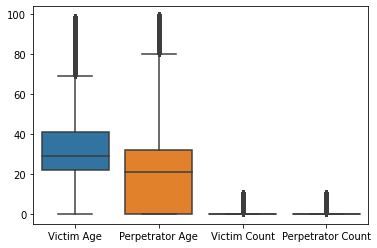

In [92]:
sns.boxplot(data = file_to_see_outliers)


In [93]:
file['Victim Age'].unique()

array([14, 43, 30, 42, 32, 38, 36, 20, 48, 31, 16, 33, 27, 21, 60, 40, 18,
        8, 25, 24, 46, 23, 22, 45, 26, 58, 17, 29, 41, 68, 13, 35, 44, 54,
       37, 51, 90, 50, 52, 61, 63, 19, 28, 70, 72, 74, 53, 57, 76, 79, 69,
       34, 66, 55, 67, 65, 47,  1, 49, 62, 75, 56, 59, 78, 39, 15,  0, 71,
       77,  2,  4, 64, 82, 85,  6,  5,  7,  9, 84, 10, 86, 11, 73, 83, 81,
       87, 80,  3, 12, 94, 93, 92, 89, 97, 88, 91, 95, 98, 96],
      dtype=int64)

In [94]:
file[file['Victim Age'] == 998].shape[0]

0

In [95]:
temp_to_delete = []
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==998:
        temp_to_delete.append(x-1)
    

In [96]:
file = file.drop(labels=temp_to_delete, axis=0)

In [97]:
file[file['Victim Age'] == 998].shape[0]

0

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

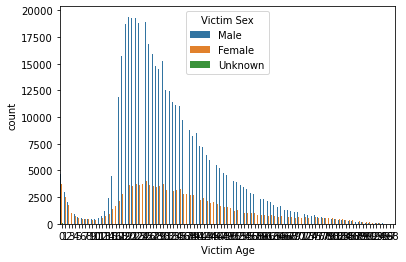

In [197]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

In [98]:
file[file['Victim Age'] == 99].shape[0]

0

In [99]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Victim Age']):
    if y==99:
        temp_to_delete.append(x-1)
    

In [100]:
file = file.drop(labels=temp_to_delete, axis=0)

<AxesSubplot:xlabel='Victim Age', ylabel='count'>

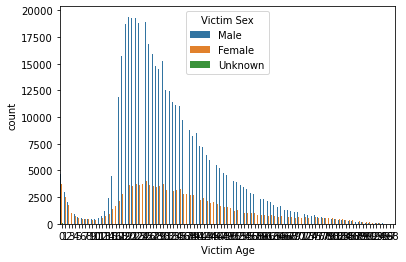

In [21]:
sns.countplot(x='Victim Age', hue='Victim Sex',data = file)

<AxesSubplot:xlabel='Perpetrator Age', ylabel='count'>

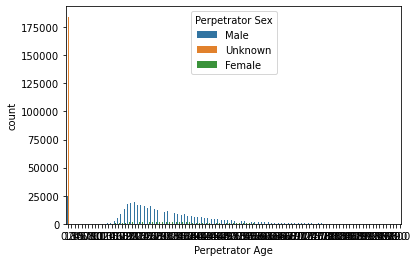

In [22]:
sns.countplot(x='Perpetrator Age', hue='Perpetrator Sex',data = file)

In [101]:
file[(file['Perpetrator Age'] == 0)].shape[0]

210059

In [102]:
file[(file['Perpetrator Sex'] == 'Unknown')].shape[0]

184930

In [103]:
file[(file['Crime Solved'] == 'No')].shape[0]

184846

In [209]:
file_test['State'].value_counts()

California              68029
Texas                   39351
New York                29538
Florida                 25767
Michigan                18149
Pennsylvania            17683
Illinois                17271
Georgia                 15049
North Carolina          14419
Louisiana               14058
Maryland                12911
Ohio                    12571
Virginia                10788
Tennessee               10553
Missouri                10476
Arizona                  9992
New Jersey               9609
Indiana                  8276
South Carolina           8272
Alabama                  6830
Oklahoma                 5896
Washington               5510
Arkansas                 4808
Wisconsin                4677
District of Columbia     4646
Mississippi              4531
Colorado                 4466
Nevada                   4324
Kentucky                 4274
Massachusetts            4102
Connecticut              3337
New Mexico               3153
Minnesota                2991
Oregon    

In [204]:
file_test['State'].value_counts(normalize=True).sum()

1.0

In [28]:
# corelation between city and if the crime is solved
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [29]:
# dropping some columns from the heatmaps because they seems to be irrelevant after couple trials:
# dropping: 'Record ID', 'Agency Code', 'Year', 'Incident', 'Record Source'
# dropping additional columns:'Agency Name', 'Agency Type', 'City','State', 'Month'
cols = ['Agency Code', 'Year', 'Incident','Agency Name', 'Agency Type', 'City','State', 'Month','Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    print(idx1, " ", cols.index(col1))
    print(idx2, " ", cols.index(col2))
    corrM[idx1, idx2] = cramers_v(file[col1], file[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

0   0
1   1
0   0
2   2
0   0
3   3
0   0
4   4
0   0
5   5
0   0
6   6
0   0
7   7
0   0
8   8
0   0
9   9
0   0
10   10
0   0
11   11
0   0
12   12
0   0
13   13
0   0
14   14
0   0
15   15
0   0
16   16
0   0
17   17
0   0
18   18
0   0
19   19
0   0
20   20
0   0
21   21
1   1
2   2
1   1
3   3
1   1
4   4
1   1
5   5
1   1
6   6
1   1
7   7
1   1
8   8
1   1
9   9
1   1
10   10
1   1
11   11
1   1
12   12
1   1
13   13
1   1
14   14
1   1
15   15
1   1
16   16
1   1
17   17
1   1
18   18
1   1
19   19
1   1
20   20
1   1
21   21
2   2
3   3
2   2
4   4
2   2
5   5
2   2
6   6
2   2
7   7
2   2
8   8
2   2
9   9
2   2
10   10
2   2
11   11
2   2
12   12


KeyboardInterrupt: 

In [105]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628198 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              628198 non-null  int64  
 1   Agency Code            628198 non-null  object 
 2   Agency Name            628198 non-null  object 
 3   Agency Type            628198 non-null  object 
 4   City                   628198 non-null  object 
 5   State                  628198 non-null  object 
 6   Year                   628198 non-null  int64  
 7   Month                  628198 non-null  object 
 8   Incident               628198 non-null  int64  
 9   Crime Type             628198 non-null  object 
 10  Crime Solved           628198 non-null  object 
 11  Victim Sex             628198 non-null  object 
 12  Victim Age             628198 non-null  int64  
 13  Victim Race            628198 non-null  object 
 14  Victim Ethnicity       628198 non-nu

In [106]:
temp_to_delete.clear()
for x,y in zip(file['Record ID'],file['Year']):
    if y < 1990:
        temp_to_delete.append(x-1)
    

In [107]:
len(temp_to_delete)

194934

In [108]:
file_test=file.drop(labels=temp_to_delete)

In [109]:
file_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433264 entries, 198531 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Record ID              433264 non-null  int64  
 1   Agency Code            433264 non-null  object 
 2   Agency Name            433264 non-null  object 
 3   Agency Type            433264 non-null  object 
 4   City                   433264 non-null  object 
 5   State                  433264 non-null  object 
 6   Year                   433264 non-null  int64  
 7   Month                  433264 non-null  object 
 8   Incident               433264 non-null  int64  
 9   Crime Type             433264 non-null  object 
 10  Crime Solved           433264 non-null  object 
 11  Victim Sex             433264 non-null  object 
 12  Victim Age             433264 non-null  int64  
 13  Victim Race            433264 non-null  object 
 14  Victim Ethnicity       433264 n

In [ ]:
# dropping some columns from the heatmaps because they seems to be irrelevant after couple trials:
# dropping: 'Record ID', 'Agency Code', 'Year', 'Incident', 'Record Source'
# dropping additional columns:'Agency Name', 'Agency Type', 'City','State', 'Month'
cols = ['Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(file_test[col1], file_test[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

#while V(x,y)=V(y,x), where V is Cramer’s V

In [110]:
file_test = file_test.reset_index()

In [111]:
file_test = file_test.drop(labels='index', axis=1)

In [88]:
file_test.dropna()

,index,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,0,205140,ID00100,Ada,Sheriff,Ada,Idaho,1990,April,1,...,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
1,1,209451,MS00101,Natchez,Municipal Police,Adams,Mississippi,1990,April,1,...,Unknown,Male,30.0,Black,Unknown,Girlfriend,Handgun,0,0,FBI
2,2,215201,SC00201,Aiken,Municipal Police,Aiken,South Carolina,1990,April,1,...,Not Hispanic,Male,19.0,Black,Not Hispanic,Stranger,Handgun,0,5,FBI
3,3,199672,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,1,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
4,4,199793,CA00112,San Leandro,Municipal Police,Alameda,California,1990,April,1,...,Not Hispanic,Male,53.0,White,Not Hispanic,Common-Law Wife,Strangulation,0,0,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433260,433260,632149,MT05601,Billings,Municipal Police,Yellowstone,Montana,2014,September,1,...,Unknown,Female,22.0,Native American/Alaska Native,Unknown,Unknown,Knife,0,0,FBI
433261,433261,630818,ME01601,Biddeford,Municipal Police,York,Maine,2014,September,1,...,Not Hispanic,Male,18.0,White,Not Hispanic,Stranger,Fire,0,0,FBI
433262,433262,635096,PA06702,York,Municipal Police,York,Pennsylvania,2014,September,1,...,Not Hispanic,Male,20.0,Black,Not Hispanic,Unknown,Handgun,0,1,FBI
433263,433263,626525,CA05800,Yuba County,Sheriff,Yuba,California,2014,September,1,...,Not Hispanic,Male,23.0,White,Hispanic,Stranger,Knife,0,0,FBI


In [37]:
# file_test.to_csv("dataset-1990-2014.csv")

In [112]:
file_test = file_test.sort_values(["Year", "Month", "City", "Incident", "Agency Name"], ascending = (True,True,True, True, True))

In [113]:
file_test.head(25)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
6497,205140,ID00100,Ada,Sheriff,Ada,Idaho,1990,April,1,Manslaughter by Negligence,...,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
10760,209451,MS00101,Natchez,Municipal Police,Adams,Mississippi,1990,April,1,Murder or Manslaughter,...,Unknown,Male,30.0,Black,Unknown,Girlfriend,Handgun,0,0,FBI
16429,215201,SC00201,Aiken,Municipal Police,Aiken,South Carolina,1990,April,1,Murder or Manslaughter,...,Not Hispanic,Male,19.0,Black,Not Hispanic,Stranger,Handgun,0,5,FBI
1132,199672,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,1,Murder or Manslaughter,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
1251,199793,CA00112,San Leandro,Municipal Police,Alameda,California,1990,April,1,Murder or Manslaughter,...,Not Hispanic,Male,53.0,White,Not Hispanic,Common-Law Wife,Strangulation,0,0,FBI
1133,199673,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,2,Murder or Manslaughter,...,Not Hispanic,Male,36.0,Black,Not Hispanic,Neighbor,Handgun,0,0,FBI
1134,199674,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,3,Murder or Manslaughter,...,Not Hispanic,Male,32.0,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
1135,199675,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,4,Murder or Manslaughter,...,Hispanic,Male,16.0,White,Hispanic,Stranger,Handgun,0,2,FBI
1136,199676,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,5,Murder or Manslaughter,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
1137,199677,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,6,Murder or Manslaughter,...,Not Hispanic,Male,36.0,Black,Not Hispanic,Girlfriend,Knife,0,0,FBI


In [ ]:
cols = ['Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(file_test[col1], file_test[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [114]:
file_test = file_test.reset_index()


In [115]:
file_test.head(25)

,index,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,6497,205140,ID00100,Ada,Sheriff,Ada,Idaho,1990,April,1,...,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun,0,0,FBI
1,10760,209451,MS00101,Natchez,Municipal Police,Adams,Mississippi,1990,April,1,...,Unknown,Male,30.0,Black,Unknown,Girlfriend,Handgun,0,0,FBI
2,16429,215201,SC00201,Aiken,Municipal Police,Aiken,South Carolina,1990,April,1,...,Not Hispanic,Male,19.0,Black,Not Hispanic,Stranger,Handgun,0,5,FBI
3,1132,199672,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,1,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
4,1251,199793,CA00112,San Leandro,Municipal Police,Alameda,California,1990,April,1,...,Not Hispanic,Male,53.0,White,Not Hispanic,Common-Law Wife,Strangulation,0,0,FBI
5,1133,199673,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,2,...,Not Hispanic,Male,36.0,Black,Not Hispanic,Neighbor,Handgun,0,0,FBI
6,1134,199674,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,3,...,Not Hispanic,Male,32.0,Black,Not Hispanic,Acquaintance,Handgun,0,0,FBI
7,1135,199675,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,4,...,Hispanic,Male,16.0,White,Hispanic,Stranger,Handgun,0,2,FBI
8,1136,199676,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,5,...,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
9,1137,199677,CA00109,Oakland,Municipal Police,Alameda,California,1990,April,6,...,Not Hispanic,Male,36.0,Black,Not Hispanic,Girlfriend,Knife,0,0,FBI


In [116]:
file_test['index'] = file_test.reset_index()

In [117]:
file_test.columns

Index(['index', 'Record ID', 'Agency Code', 'Agency Name', 'Agency Type',
       'City', 'State', 'Year', 'Month', 'Incident', 'Crime Type',
       'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon',
       'Victim Count', 'Perpetrator Count', 'Record Source'],
      dtype='object')

In [ ]:
cols = ['Agency Name', 'Agency Type', 'City','State', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(file_test[col1], file_test[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [ ]:
# https://github.com/shakedzy/dython/blob/master/dython/nominal.py
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy, log_base)
    return entropy

def theils_u(x,y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [ ]:
cols = ['Agency Name', 'Agency Type', 'City','State', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count',]
corrM = np.zeros((len(cols),len(cols)))

# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = theils_u(file_test[col1], file_test[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
corr = pd.DataFrame(corrM, index=cols, columns=cols)

fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [ ]:
from dython.nominal import associations

In [ ]:
associations(file_test.drop(labels=['index','Record ID'], axis=1), theil_u=True, figsize=(15, 15))

In [ ]:
associations(file_test.drop(labels=['index','Record ID','Perpetrator Sex','Perpetrator Age','Perpetrator Race','Perpetrator Ethnicity', 'Relationship', 'Perpetrator Count', 'Record Source'], axis=1), theil_u=True, figsize=(15, 15))

In [ ]:
associations(file_test.drop(labels=['index','Record ID','Perpetrator Sex','Perpetrator Age','Perpetrator Race','Perpetrator Ethnicity', 'Relationship', 'Perpetrator Count', 'Record Source','Agency Code','Agency Name', 'Agency Type', 'Year','Incident', 'Crime Type'], axis=1), theil_u=True, figsize=(15, 15))

In [ ]:
from dython.data_utils import split_hist

In [118]:
# I am going to choose the labels which to keep in the dataset for trainign as features
data_working_with = file_test.loc [:, [
'Agency Name','City', 'State', 'Incident', 'Crime Solved', 'Victim Sex', 'Victim Age', 'Victim Race',
       'Victim Ethnicity', 'Perpetrator Sex', 'Perpetrator Age',
       'Perpetrator Race', 'Perpetrator Ethnicity', 'Relationship', 'Weapon']]

In [119]:
data_working_with

,Agency Name,City,State,Incident,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon
0,Ada,Ada,Idaho,1,Yes,Male,17,White,Unknown,Male,21.0,White,Unknown,Acquaintance,Handgun
1,Natchez,Adams,Mississippi,1,Yes,Female,41,Black,Unknown,Male,30.0,Black,Unknown,Girlfriend,Handgun
2,Aiken,Aiken,South Carolina,1,Yes,Female,24,Black,Not Hispanic,Male,19.0,Black,Not Hispanic,Stranger,Handgun
3,Oakland,Alameda,California,1,No,Female,23,White,Not Hispanic,Unknown,0.0,Unknown,Unknown,Unknown,Handgun
4,San Leandro,Alameda,California,1,Yes,Female,57,White,Not Hispanic,Male,53.0,White,Not Hispanic,Common-Law Wife,Strangulation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433259,Billings,Yellowstone,Montana,1,Yes,Female,29,White,Unknown,Female,22.0,Native American/Alaska Native,Unknown,Unknown,Knife
433260,Biddeford,York,Maine,1,Yes,Male,26,White,Not Hispanic,Male,18.0,White,Not Hispanic,Stranger,Fire
433261,York,York,Pennsylvania,1,Yes,Male,18,Black,Not Hispanic,Male,20.0,Black,Not Hispanic,Unknown,Handgun
433262,Yuba County,Yuba,California,1,Yes,Male,25,White,Not Hispanic,Male,23.0,White,Hispanic,Stranger,Knife


In [179]:
# for training purpose of the ohe we will pick all features which is not target
X = data_working_with.drop(labels=['Agency Name','Crime Solved','Relationship', 'Weapon'], axis='columns')

In [180]:
# for training purpose of the ohe we will pick all features which is not target
X1 = data_working_with.drop(labels=['Agency Name','Crime Solved','Relationship', 'Weapon'], axis='columns')

In [181]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433264 entries, 0 to 433263
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   City                   433264 non-null  object 
 1   State                  433264 non-null  object 
 2   Incident               433264 non-null  int64  
 3   Victim Sex             433264 non-null  object 
 4   Victim Age             433264 non-null  int64  
 5   Victim Race            433264 non-null  object 
 6   Victim Ethnicity       433264 non-null  object 
 7   Perpetrator Sex        433264 non-null  object 
 8   Perpetrator Age        433264 non-null  float64
 9   Perpetrator Race       433264 non-null  object 
 10  Perpetrator Ethnicity  433264 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 36.4+ MB


In [182]:
X1 = X1.to_numpy()

In [183]:
y = data_working_with['Crime Solved']

In [184]:
y = y.to_numpy()

In [185]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [186]:
# nainportovanie z kniznice keras np_utils a to_categorical
# prepis do kategorickej premennej, prevedie cele cisla na binarnu maticu
from keras.utils import np_utils 
from keras.utils import to_categorical


In [187]:
X1[0]

array(['Ada', 'Idaho', 1, 'Male', 17, 'White', 'Unknown', 'Male', 21.0,
       'White', 'Unknown'], dtype=object)

In [169]:
label_encoder = LabelEncoder()

In [188]:
X1[:,0] = label_encoder.fit_transform(X1[:,0])
X1[:,1] = label_encoder.fit_transform(X1[:,1])
X1[:,3] = label_encoder.fit_transform(X1[:,3])

X1[:,5] = label_encoder.fit_transform(X1[:,5])
X1[:,6] = label_encoder.fit_transform(X1[:,6])
X1[:,7] = label_encoder.fit_transform(X1[:,7])
X1[:,9] = label_encoder.fit_transform(X1[:,9])
X1[:,10] = label_encoder.fit_transform(X1[:,10])
# X1[:,11] = label_encoder.fit_transform(X1[:,11])
# X1[:,12] = label_encoder.fit_transform(X1[:,12])
# X1[:,13] = label_encoder.fit_transform(X1[:,13])


# X[:,0] = ohe.fit_transform(X[:,0])
# X[:,1] = ohe.fit_transform(X[:,1])
# X[:,2] = ohe.fit_transform(X[:,2])
# X[:,4] = ohe.fit_transform(X[:,4])
# X[:,6] = ohe.fit_transform(X[:,6])
# X[:,7] = ohe.fit_transform(X[:,7])
# X[:,8] = ohe.fit_transform(X[:,8])
# X[:,10] = ohe.fit_transform(X[:,10])
# X[:,11] = ohe.fit_transform(X[:,11])
# X[:,12] = ohe.fit_transform(X[:,12])
# X[:,13] = ohe.fit_transform(X[:,13])
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

# column_transform = make_column_transformer((OneHotEncoder(), ['Victim Sex', 'Victim Race',
#        'Victim Ethnicity', 'Perpetrator Sex',
#        'Perpetrator Race', 'Perpetrator Ethnicity']), remainder='passthrough')
# # ohe = OneHotEncoder(categories=[list(data_working_with.drop(labels=['Crime Solved','Agency Name', 'City', 'State'], axis='columns').select_dtypes(include=['object']).columns)])
# X = column_transform.fit_transform(X)

In [189]:
X.shape

(433264, 11)

In [190]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [191]:
# X[:,22] = label_encoder.fit_transform(X[:,22])
# X[:,23] = label_encoder.fit_transform(X[:,23])

In [192]:
X1[0]

array([3, 12, 1, 1, 17, 4, 2, 1, 21.0, 4, 2], dtype=object)

In [193]:
y = label_encoder.fit_transform(y)

In [195]:
X1 = np_utils.to_categorical(X1)

MemoryError: Unable to allocate 31.2 GiB for an array with shape (4765904, 1758) and data type float32

In [73]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [74]:
y = np_utils.to_categorical(y)

In [75]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [76]:
from sklearn.model_selection import train_test_split

# nainportovanie z kniznice sklearn MinMaxScaler, ktory transformuje prvky skalovanim jednotlivych prvkov na dany rozsah 
from sklearn.preprocessing import MinMaxScaler

# nainportovanie z kniznice keras Sequential, ktory sa pouziva na vytvorenie modelu ucenia pri ktorom sa vytvaraju instancie
# triedy Sequential a pridavaju/vytvaraju sa do nej vrstvy modelu
from keras.models import Sequential 
# nainportovanie z kniznice keras Dense
#pomocou Dense su definovane plne spojene vrstvy, kde ako prvy argument sa zadava pocet neuronov alebo uzlov vo vrstve a pomocou
# aktivacneho argumentu urcit aktivacnu funkciu
from keras.layers import Dense 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1) 

# Vypis rozdelenia na trenovacie a testovacie data
print("Trenovacia mnozina ma",X_train.shape[0])
print("Testovacia mnozina ma",X_test.shape[0])

Trenovacia mnozina ma 346612
Testovacia mnozina ma 86653


In [78]:
# Normalizacia cisel
# normalizacia sa robi hlavne ked sa hodnoty v datasete velmi lisia, ako v nasom pripade, mame hodnoty napr. 1007.7 a 0.6
# odkaz: https://www.quora.com/Why-do-we-normalize-the-data
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train) # normalizacia cisel v premennej X_train
X_test = scaler.fit_transform(X_test) # normalizacia cisel v premennej X_test
y_train = scaler.fit_transform(y_train) # normalizacia cisel v premennej y_train
y_test = scaler.fit_transform(y_test) # normalizacia cisel v premennej y_test

# ukazka vysledku normalizacie cisel
print(X_train[0]) # ukazka nulteho riadku v premennej X_train

[0.         1.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 1.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.53044963 0.08
 0.06806807 0.17346939 0.2020202 ]


In [79]:
X.shape

(433265, 27)

In [80]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(27, activation='relu'),
    Dense(18, activation='relu'),
    Dense(12, activation='relu'),
    Dense(8, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 27)                756       
_________________________________________________________________
dense_1 (Dense)              (None, 27)                756       
_________________________________________________________________
dense_2 (Dense)              (None, 18)                504       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

In [81]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

Epoch 1/100


ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 2) and (None, 1) are incompatible


In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='softmax', input_shape=[X_train.shape[1]]),
    Dense(27, activation='softmax'),
    Dense(18, activation='softmax'),
    Dense(12, activation='softmax'),
    Dense(8, activation='softmax'),
    Dense(5, activation='softmax'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='softplus', input_shape=[X_train.shape[1]]),
    Dense(27, activation='softplus'),
    Dense(18, activation='softplus'),
    Dense(12, activation='softplus'),
    Dense(8, activation='softplus'),
    Dense(5, activation='softplus'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='softsign', input_shape=[X_train.shape[1]]),
    Dense(27, activation='softsign'),
    Dense(18, activation='softsign'),
    Dense(12, activation='softsign'),
    Dense(8, activation='softsign'),
    Dense(5, activation='softsign'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='tanh', input_shape=[X_train.shape[1]]),
    Dense(27, activation='tanh'),
    Dense(18, activation='tanh'),
    Dense(12, activation='tanh'),
    Dense(8, activation='tanh'),
    Dense(5, activation='tanh'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='selu', input_shape=[X_train.shape[1]]),
    Dense(27, activation='selu'),
    Dense(18, activation='selu'),
    Dense(12, activation='selu'),
    Dense(8, activation='selu'),
    Dense(5, activation='selu'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='elu', input_shape=[X_train.shape[1]]),
    Dense(27, activation='elu'),
    Dense(18, activation='elu'),
    Dense(12, activation='elu'),
    Dense(8, activation='elu'),
    Dense(5, activation='elu'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:
# https://glassboxmedicine.com/2019/01/17/introduction-to-neural-networks/
# https://www.researchgate.net/post/How-to-decide-the-number-of-hidden-layers-and-nodes-in-a-hidden-layer

# Pridanie zvoleneho modelu

model = Sequential([
    Dense(27, activation='exponential', input_shape=[X_train.shape[1]]),
    Dense(27, activation='exponential'),
    Dense(18, activation='exponential'),
    Dense(12, activation='exponential'),
    Dense(8, activation='exponential'),
    Dense(5, activation='exponential'),
    Dense(1)
])

# zhrnutie modelu keras
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# trenovanie modelu keras
# X_train a y_train su nase data
# validation_split - hodnota medzi 0 a 1, model oddeluje tuto cast trenovacich dat, nebude ich trenovat a na konci kazdej
# iteracie vyhodnoti stratu a akekolvek modelove metriky
# epochs - pocet iteracii
# batch_size - definuje pocet vzoriek, ktore sa budu sirit prostrednictvom siete, podla X_train zistit vypocet delitelov cisla
# verbose - hodnota moze byt 0, 1 alebo 2, ovplyvnuje detailnost vystupu ktoru vidime nizsie 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 4332)
# evaluate the keras model
accuracy = model.evaluate(X_train, y_train)
#print(accuracy*100)

In [ ]:
y_pred = model.predict(X_test)
# uspesnost neuronovej siete
score = model.evaluate(X_test, y_test, verbose=1)
print('Presnost modelu je: ',str(round(score[1]*100,2)), '%')
print('Pri strate: ',str(round(score[0]*100,2)), '%')

In [ ]:

# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys())
# Graf zobrazujuci presnost modelu
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Presnost modelu')
plt.ylabel('Presnost')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()

In [ ]:
# Graf zobrazujuci chybovost modelu
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Chyba modelu')
plt.ylabel('Chyba')
plt.xlabel('Epoch')
plt.legend(['testovacia', 'trenovacia'])
plt.show()